# BlueCruise Live Vehicle Testing Manuevers
- Mike Conducted Testing on 11/15/2024

### Approach:
1. Line up the BlueCruise data with the Camera Data and extract risk manuevers
2. Analyze the risk manuevers
3. Use the risk manuevers as new sequences for the Near Miss Identification

### How to run cells:
- Run all cells from top to bottom
- SHIFT + ENTER to run a cell


In [1]:
# Imports

import pandas as pd

import matplotlib
matplotlib.use('nbagg')
%matplotlib inline

import matplotlib.dates as mdates

import matplotlib.pyplot as plt
import seaborn as sns

# Load Datasets

In [2]:
# Load trip dataset
trip1_df = pd.read_csv('data/trip1_data_mike_Nov15.csv')


In [3]:
trip1_df['date_time'] = pd.to_datetime(trip1_df['date_time'], format='ISO8601')

In [4]:
# Find the duration of this trip
start_time = trip1_df['date_time'].min()
end_time = trip1_df['date_time'].max()
duration = end_time - start_time
print(f"Start Time: {start_time}")
print(f"End Time: {end_time}")
print(f"Duration: {duration}")

Start Time: 2024-11-15 10:45:00+00:00
End Time: 2024-11-15 11:11:58+00:00
Duration: 0 days 00:26:58


C:\Users\donav\AppData\Local\Temp\ipykernel_43084\2175416064.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()


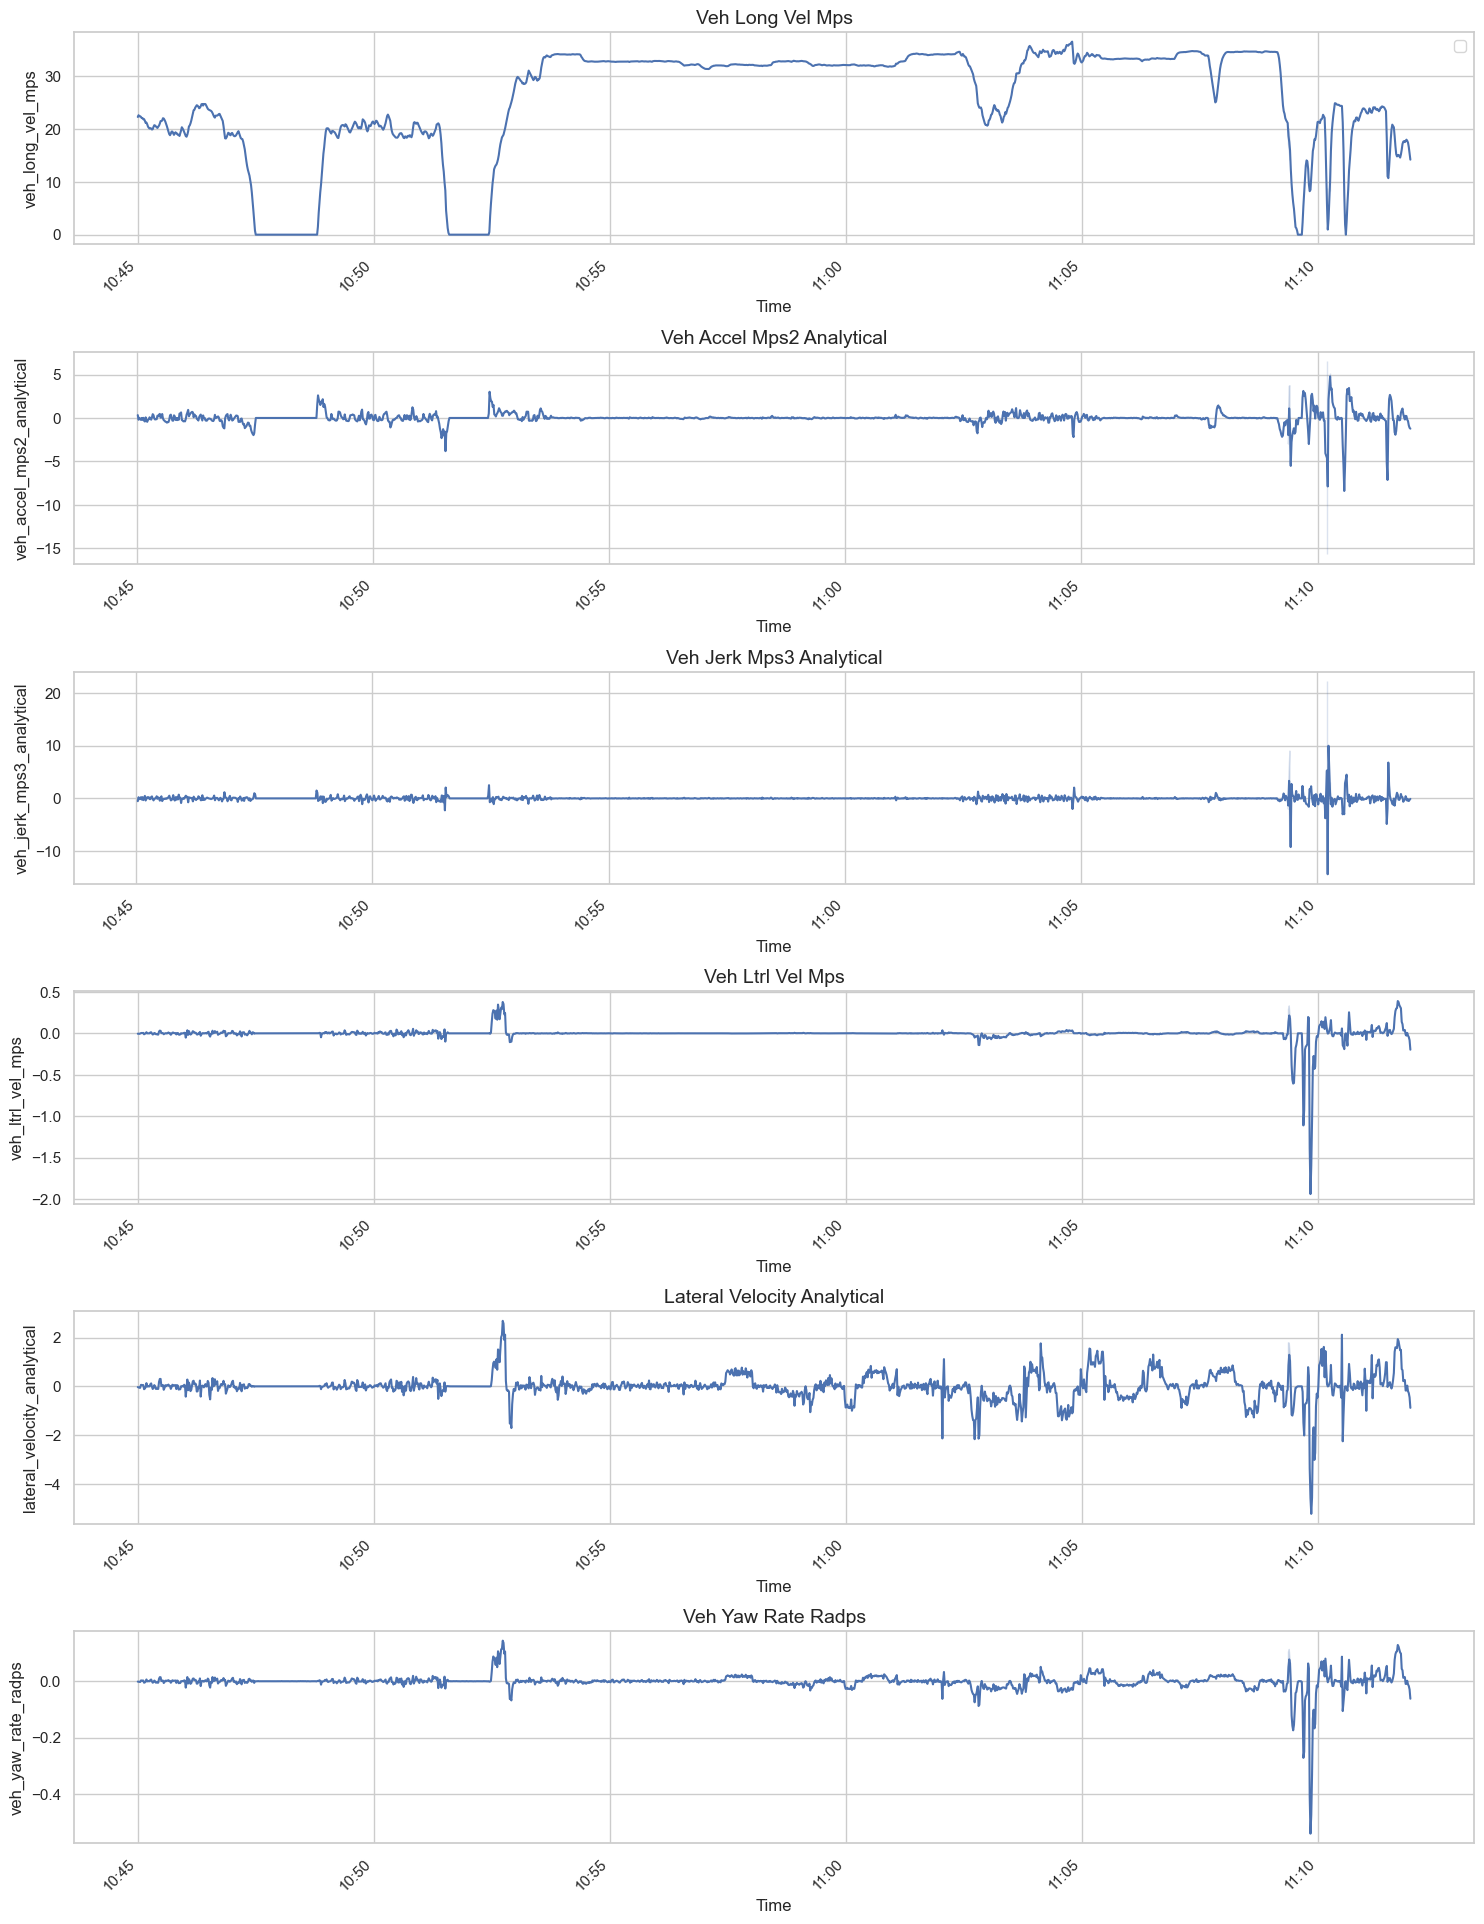

In [5]:
# First, create a new column for velocity in mph (1 mps = 2.237 mph)
trip1_df['veh_long_vel_mph'] = trip1_df['veh_long_vel_mps'] * 2.237

# # Calculate acceleration by taking the derivative of velocity
trip1_df['veh_accel_mps2_analytical'] = trip1_df['veh_long_vel_mps'].diff()

# # Calculate jerk by taking the derivative of acceleration
trip1_df['veh_jerk_mps3_analytical'] = trip1_df['veh_accel_mps2_analytical'].diff()

# Analytically calculate the lateral velocity: v_lat = v_long * yaw_rate
trip1_df['lateral_velocity_analytical'] = trip1_df['veh_long_vel_mps'] * trip1_df['veh_yaw_rate_radps']

# Set features to plot, including the new velocity in mph
features_to_plot = ['veh_long_vel_mps', 'veh_accel_mps2_analytical', 'veh_jerk_mps3_analytical', 'veh_ltrl_vel_mps', 'lateral_velocity_analytical', 'veh_yaw_rate_radps']

# Set the style of the plot
sns.set_theme(style="whitegrid")

# Create the figure and axes with one additional subplot for velocity in mph
fig, ax = plt.subplots(len(features_to_plot), 1, figsize=(15, 2 + (3 * len(features_to_plot))))  # Adjust the size for the additional subplot



for i, feature in enumerate(features_to_plot):
    sns.lineplot(data=trip1_df, x='date_time', y=feature, ax=ax[i], linewidth=1.5, alpha=1)
    ax[i].set_title(feature.replace('_', ' ').title(), fontsize=14)
    ax[i].set_ylabel('mph' if 'mph' in feature else feature, fontsize=12)
    ax[i].set_xlabel('Time', fontsize=12)
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Set the formatter for the x-axis to show hour and minute
    plt.setp(ax[i].get_xticklabels(), rotation=45, ha='right')


# Add the legend to only one subplot to avoid repetition
ax[0].legend()


plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the top to make space for the legend
plt.show()

# Close up of the plot
- Enter the start and end times you are interested in investigating

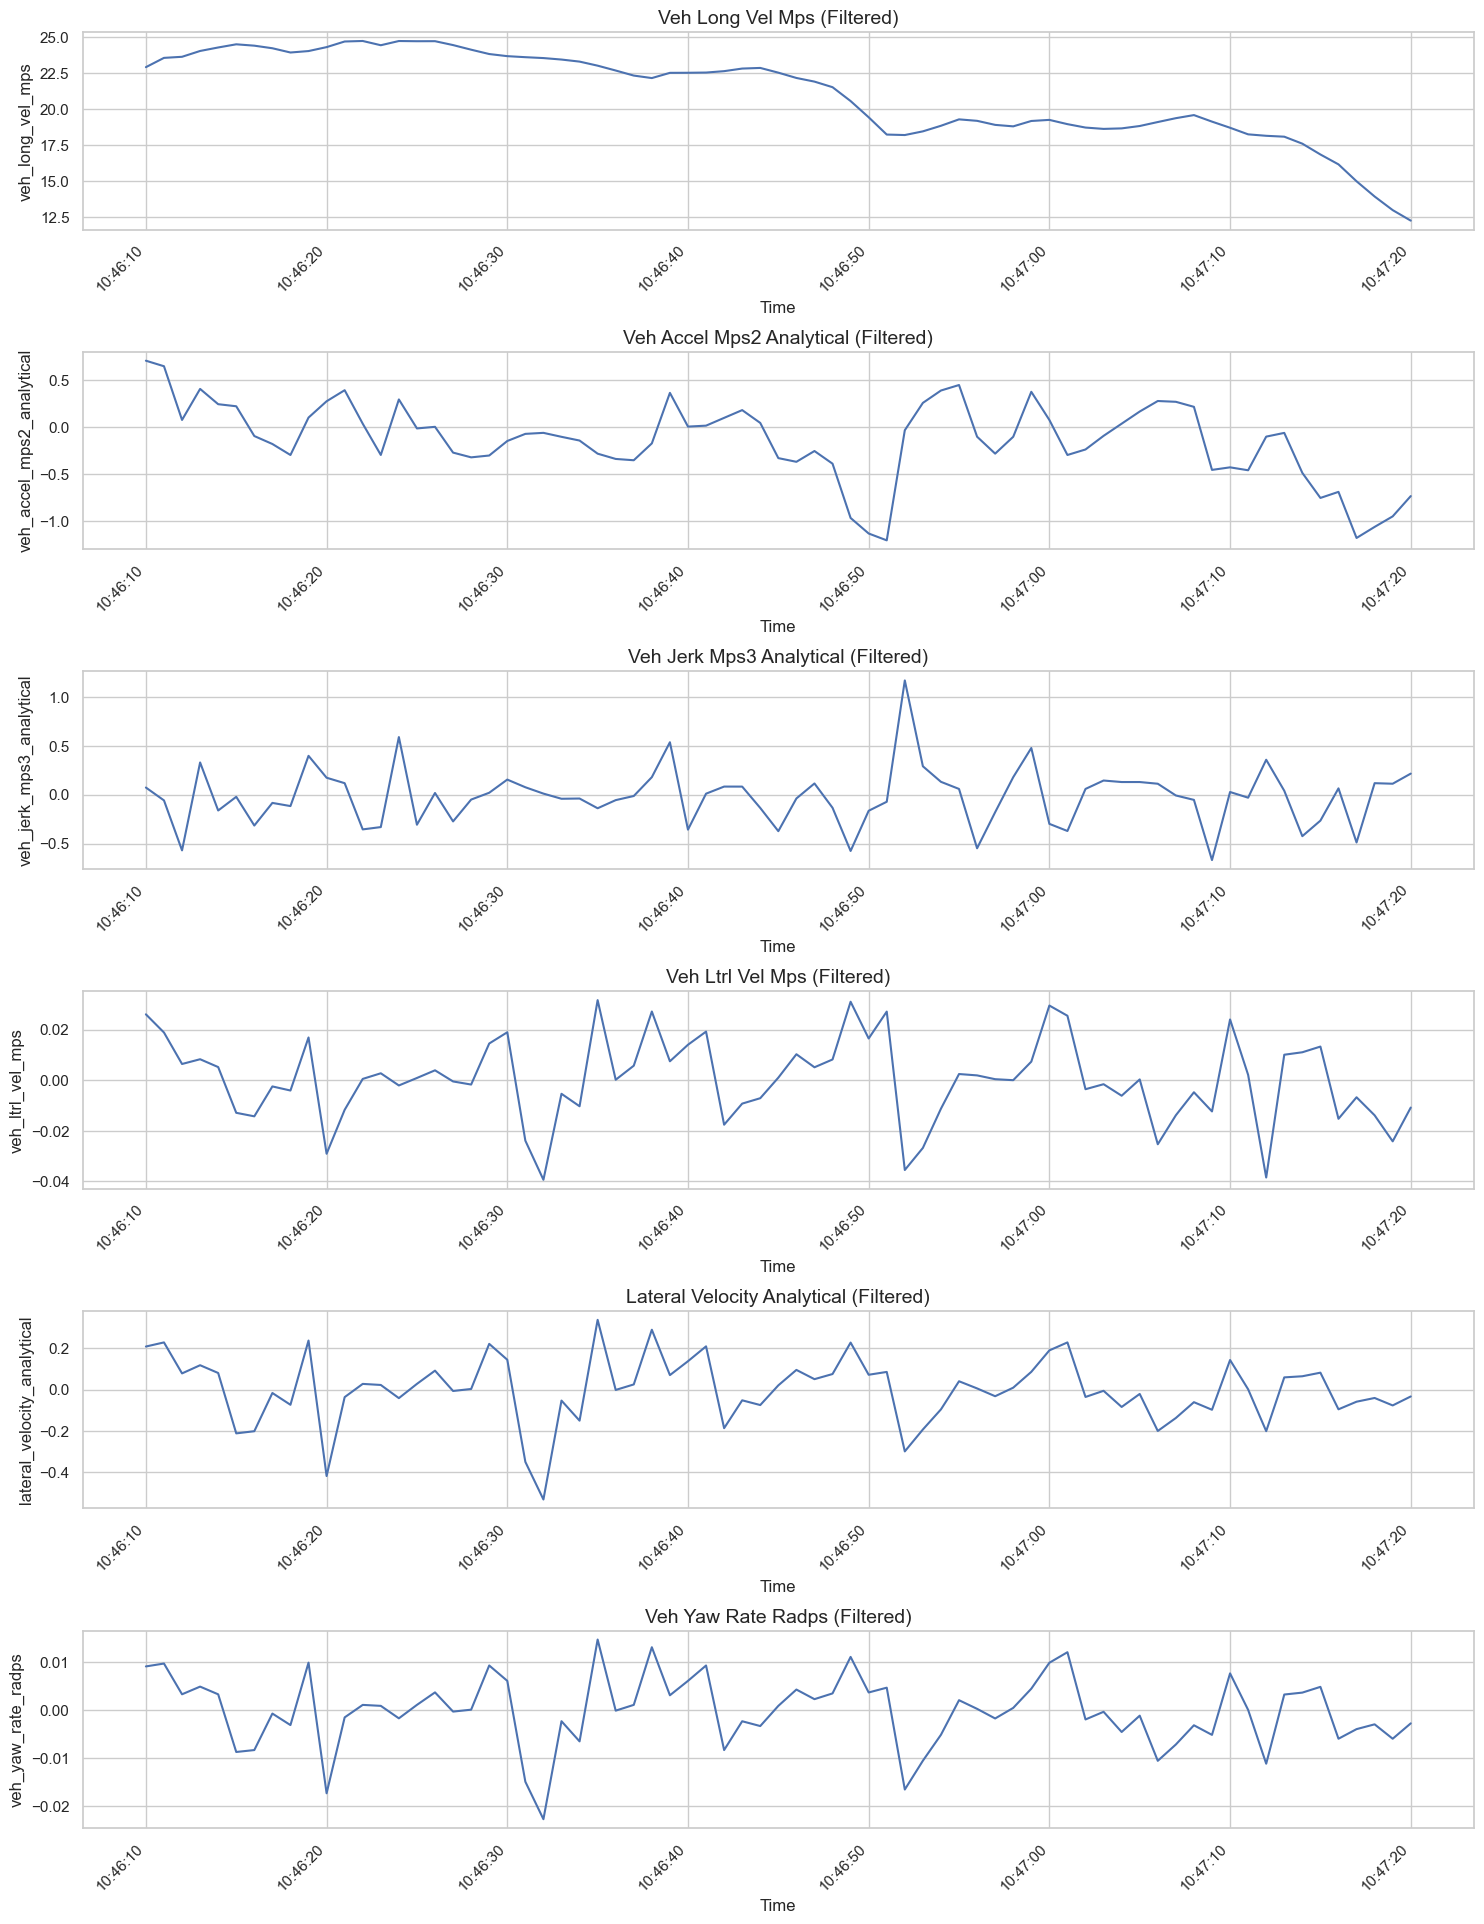

In [6]:
# Plot the trip for a specific period of time
start_time = '2024-11-15 10:46:10'
end_time = '2024-11-15 10:47:20'

trip1_df_filtered = trip1_df[(trip1_df['date_time'] >= start_time) & (trip1_df['date_time'] <= end_time)]

# Set features to plot for the filtered data
features_to_plot_filtered = ['veh_long_vel_mps', 'veh_accel_mps2_analytical', 'veh_jerk_mps3_analytical', 'veh_ltrl_vel_mps', 'lateral_velocity_analytical', 'veh_yaw_rate_radps']

# Create the figure and axes for the filtered data
fig, ax = plt.subplots(len(features_to_plot_filtered), 1, figsize=(15, 2 + (3 * len(features_to_plot_filtered))))

for i, feature in enumerate(features_to_plot_filtered):
    sns.lineplot(data=trip1_df_filtered, x='date_time', y=feature, ax=ax[i], linewidth=1.5, alpha=1)
    ax[i].set_title(f'{feature.replace("_", " ").title()} (Filtered)', fontsize=14)
    ax[i].set_ylabel('mph' if 'mph' in feature else feature, fontsize=12)
    ax[i].set_xlabel('Time', fontsize=12)
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))  # Set the formatter for the x-axis to show hour and minute
    plt.setp(ax[i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the top to make space for the legend
plt.show()


